In [15]:

library('hdp')
library('clusterCrit')
library('grid')
library('gridExtra')
library('ggplot2')
library('ggrepel')
library(Hmisc)
source('../../../src/tools.R')     # custom tools function
source('../../../src/hdp_tools.R') # hdp related functions
source('../../../src/hdp_tools_yanis.R')
theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

In [32]:
table_assignment <- read.table('hdp_gridsearch_few_cluster.tsv',header=T,sep='\t')
table_assignment <- rbind(table_assignment,read.table('hdp_gridsearch_modif_few_cluster.tsv',header=T,sep='\t'))
table_assignment <- rbind(table_assignment,read.table('hdp_gridsearch_modif.tsv',header=T,sep='\t'))
table_assignment <- rbind(table_assignment,read.table('hdp_gridsearch_new_alphas.tsv',header=T,sep='\t'))
table_assignment <- rbind(table_assignment,read.table('hdp_gridsearch_new.tsv',header=T,sep='\t'))
result_table <- rbind(table_assignment,read.table('hdp_gridsearch.tsv',header=T,sep='\t'))
#result_table[nrow(result_table)+1,] <- c(3,17,250,7000,20,"gaussian",2,0.5,10,25,1850,3.3,NaN)


In [41]:
summary(result_table)

     chains          inicc             n           burnin         space      
 Min.   :3.000   Min.   : 5.00   Min.   : 50   Min.   :1000   Min.   :20.00  
 1st Qu.:3.000   1st Qu.:13.00   1st Qu.:350   1st Qu.:5000   1st Qu.:20.00  
 Median :3.000   Median :15.00   Median :350   Median :5000   Median :20.00  
 Mean   :3.623   Mean   :14.16   Mean   :361   Mean   :5675   Mean   :21.56  
 3rd Qu.:4.000   3rd Qu.:15.00   3rd Qu.:450   3rd Qu.:7000   3rd Qu.:20.00  
 Max.   :5.000   Max.   :17.00   Max.   :450   Max.   :7000   Max.   :30.00  
                                                                             
      base_dist       alphaa          alphab        n_components   
 gaussian  :132   Min.   :1.000   Min.   :0.5000   Min.   : 4.000  
 uniform   :132   1st Qu.:1.000   1st Qu.:0.5000   1st Qu.: 5.000  
 repetition: 38   Median :1.000   Median :1.0000   Median : 8.000  
 binomial  :  6   Mean   :1.442   Mean   :0.7792   Mean   : 7.468  
                  3rd Qu.:2.000   3r

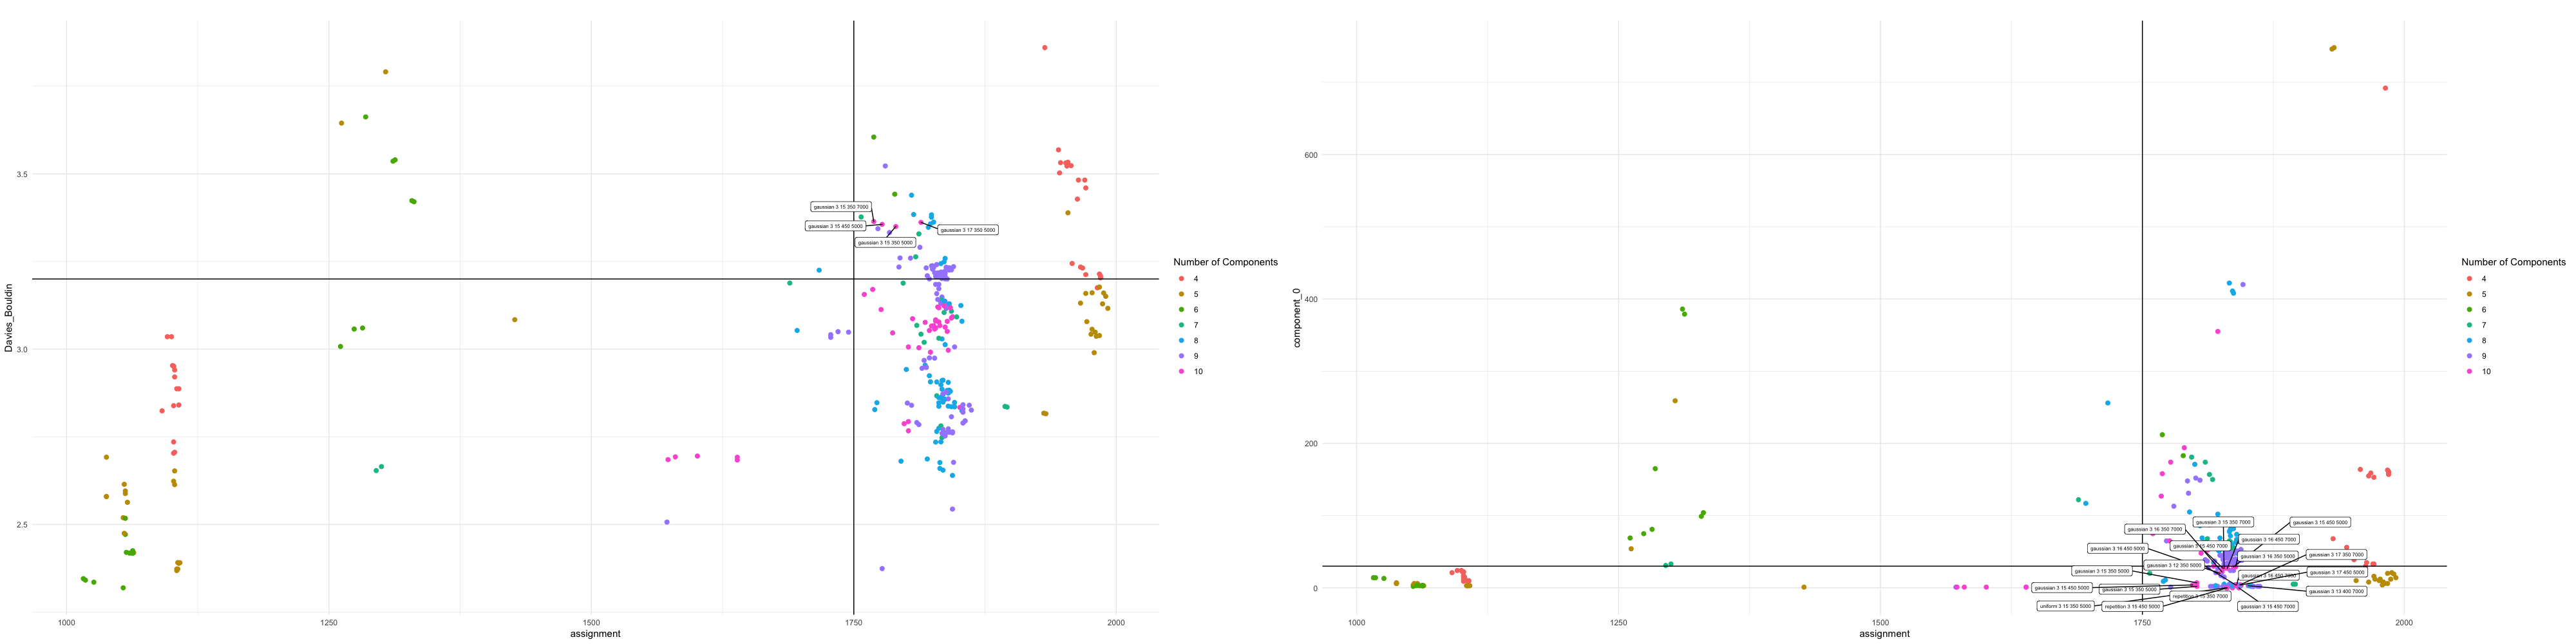

In [54]:
set_notebook_plot_size(40, 10)

# add labels
result_table_S_DB <- result_table[result_table$assignment > 1750& result_table$Davies_Bouldin > 3.2,]
result_table_S_DB$good <- ifelse(result_table_S_DB$assignment > 1750 & result_table_S_DB$Davies_Bouldin > 3.2 & result_table_S_DB$n_components>=10, paste(result_table_S_DB$base_dist,result_table_S_DB$chains,result_table_S_DB$inicc,result_table_S_DB$n,result_table_S_DB$burnin),'')

result_table_A_0 <- result_table[result_table$assignment > 1750 & result_table$component_0 < 30,]
result_table_A_0$good <- ifelse(result_table_A_0$assignment > 1750 & result_table_A_0$component_0 < 30 & result_table_A_0$n_components>=10, paste(result_table_S_DB$base_dist,result_table_A_0$chains,result_table_A_0$inicc,result_table_A_0$n,result_table_A_0$burnin),'')

g1 <- ggplot(result_table) +
        geom_point(aes(x = assignment, y = Davies_Bouldin, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue',"dark", "orange", "green",'blue',"red", "orange", "green",'blue'), labels = 0:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 3.2) + #we want higher than 3rd quart
        geom_vline(xintercept = 1750) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = Davies_Bouldin, label=good), size=2, data=result_table_S_DB) + labs(colour = "Number of Components")

g2 <- ggplot(result_table) +
        geom_point(aes(x = assignment, y = component_0, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue'),labels = 8:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 30) + #we want lower than 1st quart
        geom_vline(xintercept = 1750) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = component_0, label=good), size=2, data=result_table_A_0) + labs(colour = "Number of Components")

grid.arrange(g1, g2, nrow = 1)